In [1]:
from groo.groo import get_root
root_dir = get_root(".root_dir_covid")

import os

print(root_dir)
import sys
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts"))


import numpy as np
import pandas as pd
from cov_functions import *
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings('ignore')
from scipy.spatial.distance import correlation as Dcorr
import bambi as bmb
import arviz as az
import json
import pickle
import bammm.bammm as mm

from tslearn.utils import to_time_series
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

import tslearn as tsl

# load main dataset
df = pd.read_csv(os.path.join(root_dir, "data", "full_dataset_only_complete.csv"))
sys.path.insert(1, os.path.join(root_dir, "covid-fear", "scripts", "lib", "hoeffding"))

##### VERY IMPORTANT ####
df["state_severity"] = df["deaths7_norm"]

/data/drive/postdoc/Project4_covid


/home/ondrej/anaconda3/envs/covid_pyenv/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [29]:
def estimate_clusters(ts, n_clusters, metric="euclidean"):

    # 'dtw' stands for dynamic time warping, i.e. it aligns multiple sources that are temporally misaligned 
    # 'euclidean' 
  
    # specify model
    model = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric, max_iter=50, verbose=0, n_init=15) #specify model
    # fit model 
    model.fit(ts) #fit

    ## not sur ewhat's the silhouette score
    #labels = model.fit_predict(ts) # ??
    #silhouette_score(ts, labels, metric=metric) #?? 

    #which cluster each participant belongs to - awesome!
    cl_ids = model.predict(ts) 
    tdf = pd.DataFrame()
    ## back to pandas
    tdf["cl"] = cl_ids
    tdf["id"] = tdf.index

    # claculate centroids to data frame
    #df_centroids = pd.DataFrame()
    #for clid, cl in enumerate(m.cluster_centers_):
    #    df_centroids["cl"+str(clid)] = pd.Series(cl[:,0]) 


    
    return tdf, model

c=2 S=0.6924071227452449
c=3 S=0.8870294981497848
c=4 S=0.6299506076198542
c=5 S=0.37552281214386773
c=6 S=0.11247516459051995
c=7 S=0.10335973522926215


Text(0.5, 0, 'number of clusters')

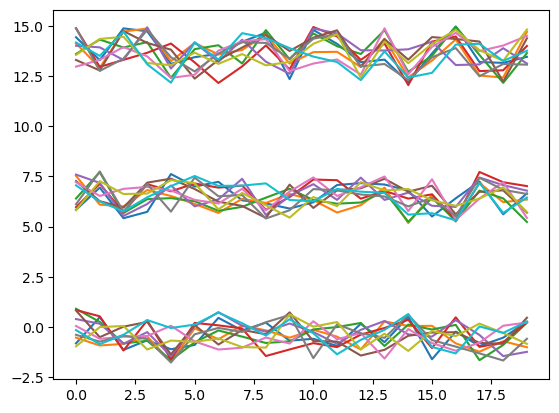

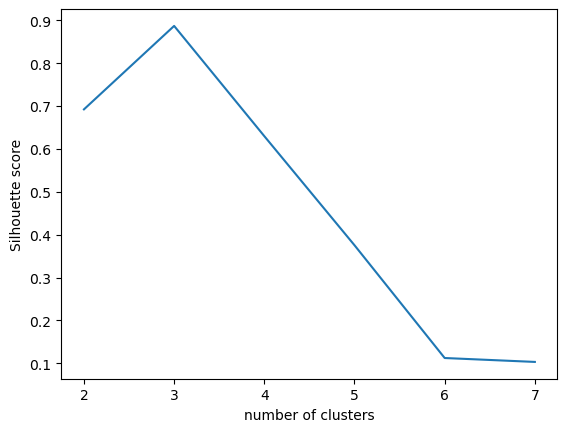

In [42]:
trials = 20
samples = 10
cl1 = 5 + np.random.rand(20)
cl2 = -2 + np.random.rand(20)
cl3 = 12 + np.random.rand(20)
df = pd.DataFrame({'cl1':cl1, 'cl2':cl2, 'cl3':cl3 })
data = pd.DataFrame()
for c in ['cl1', 'cl2', 'cl3']:
    for i in range(1,samples+1):
        data = pd.concat([data, pd.Series(df[c]+2*np.random.rand(20))], axis=1)

data.plot(legend=False)
ts = tsl.utils.to_time_series(data.T)

ssc =[]
clsize = [2,3,4,5,6,7]
for nc in clsize:
    tdf, m = estimate_clusters(ts, n_clusters=nc, metric="euclidean")
    sc = silhouette_score(ts,tdf.cl, metric="euclidean")
    ssc.append(sc)
    print("c="+str(nc) + " S="+ str(sc))
plt.figure()
plt.plot(clsize, ssc)
plt.ylabel("Silhouette score")
plt.xlabel("number of clusters")



c=2 S=0.7039721124950222
c=3 S=0.7527322720842504
c=4 S=0.7644878963707196
c=5 S=0.6269889988733228
c=6 S=0.43341599054312685
c=7 S=0.2791376722330571


Text(0.5, 0, 'number of clusters')

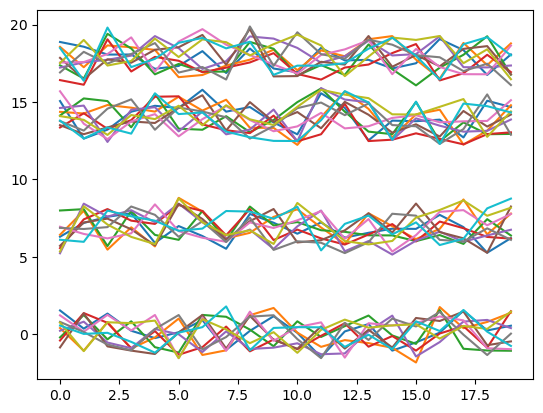

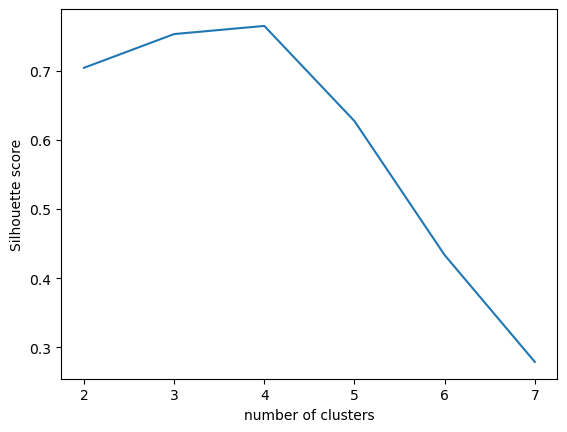

In [43]:
trials = 20
samples = 10
cl1 = 5 + np.random.rand(20)
cl2 = -2 + np.random.rand(20)
cl3 = 12 + np.random.rand(20)
cl4 = 16 + np.random.rand(20)

df = pd.DataFrame({'cl1':cl1, 'cl2':cl2, 'cl3':cl3, 'cl4':cl4 })
data = pd.DataFrame()
for c in ['cl1', 'cl2', 'cl3', 'cl4']:
    for i in range(1,samples+1):
        data = pd.concat([data, pd.Series(df[c]+3*np.random.rand(20))], axis=1)

data.plot(legend=False)
ts = tsl.utils.to_time_series(data.T)

ssc =[]
clsize = [2,3,4,5,6,7]
for nc in clsize:
    tdf, m = estimate_clusters(ts, n_clusters=nc, metric="euclidean")
    sc = silhouette_score(ts,tdf.cl, metric="euclidean")
    ssc.append(sc)
    print("c="+str(nc) + " S="+ str(sc))
plt.figure()
plt.plot(clsize, ssc)
plt.ylabel("Silhouette score")
plt.xlabel("number of clusters")